In [105]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import itertools

In [42]:
df1 = pd.read_csv("steps.csv", sep=";")
df2 = pd.read_csv("survey.csv") 

Ik heb beide csv bestanden ingelezen. Ik heb voor databestand "steps.csv" aangegeven dat de waarden gescheiden moeten worden op ";" omdat het databestand anders niet goed wordt ingelezen.

In [43]:
df = pd.merge(df1, df2, on="id")

Ik heb df1 en df2 samengevoegd. Hierbij heb ik aangegeven dat dit moet gebeuren op basis van de overeenkomende variabele "id".

In [44]:
df["mean_steps"] = df.loc[:,"20-6-2013" : "13-5-2014"].mean(axis=1)

Ik heb een kolom met de gemiddelde stappen gemaakt. Hiervoor heb ik eerst de benodigde kolommen geselecteerd en vervolgens hier het gemiddelde van berekend. Hierbij heb ik axis op 1 gezet zodat de waardes horizontaal samengepakt zijn.

In [45]:
df = df[(df["weight"] < 250) & (df["weight"] > 30)]
df = df[(df["height"] < 250) & (df["height"] > 50)]

IK heb de waarden met een gewicht boven de 300 of onder de 30 verwijderd omdat dit niet realistisch is. Het zelfde geldt voor waarden met een lengte boven 250 of onder 50. 

In [46]:
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean_steps
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630


Ik heb de bovenste rijen van de dataframe weergegeven. 

Text(0.5, 0, 'Gemiddelde stappen')

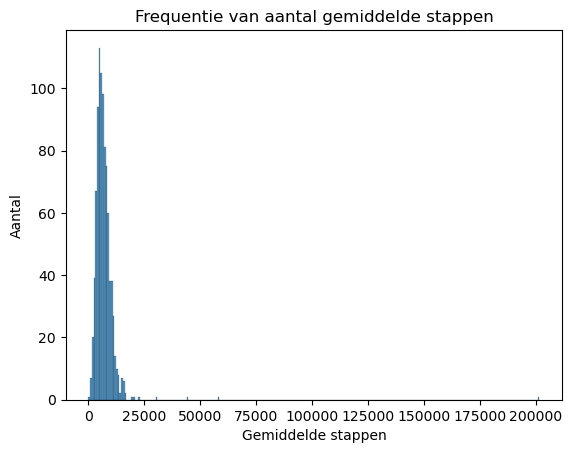

In [73]:
sns.histplot(data=df, x="mean_steps")
plt.title("Frequentie van aantal gemiddelde stappen")
plt.ylabel("Aantal")
plt.xlabel("Gemiddelde stappen")

Ik heb de gemiddelde stappen per deelnemer weergegeven in een histogram. Ik heb voor een histogram gekozen omdat je hier op de y-as kan zien hoe vaak een waarde voorkomt. Dit geeft een duidelijk inzicht.

In [62]:
df["mean_steps"].mean()


7020.903488708383

In [63]:
df["mean_steps"].median()

6244.857142857143

Ik heb gekozen om het gemiddelde en de mediaan weer te geven, omdat dit handige waardes zijn om conclusies mee te trekken.

# de histogram is redelijk normaal verdeeld op een paar outliers na. Hierdoor is hij ook verder naar links verplaatst. Ondanks dat het gemiddelde hoger ligt dan de mediaan zou ik niet concluderen dat de verdeling right skewed is. Dit is ook lastig vast te stellen omdat de mode niet goed vast te stellen is omdat er geen waardes zijn die exact hetzelfde zijn. Het gemiddelde ligt ook hoger dan de mediaan doordat er een paar outliers (met hoge waardes) aanwezig zijn. 

In [79]:
df = df[(df["mean_steps"] < 200000)]

Ik heb de extreme outlier in "mean_steps" eruit gehaald omdat deze ervoor zorgde dat ik de rest van de data niet duidelijk kan aflezen

<AxesSubplot:xlabel='weight', ylabel='mean_steps'>

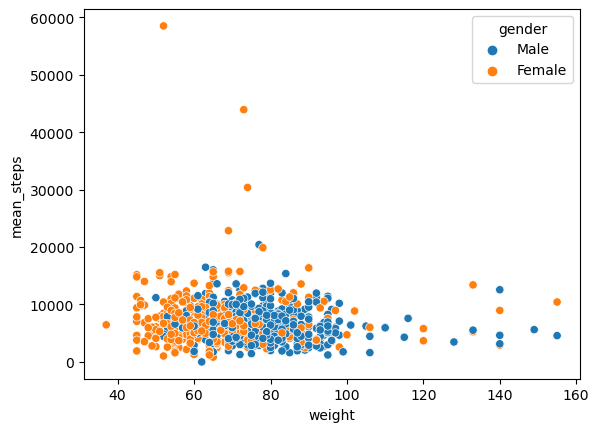

In [90]:
sns.scatterplot(data=df, y="mean_steps", x="weight", hue="gender")

Ik heb ervoor gekozen om de gemiddelde stappen tegenover het gewicht te zetten omdat ik benieuwd was naar de relatie van stijging in gewicht naar verandering in gemiddelde stappen. Hierbij heb ik gender meegenomen omdat ik benieuwd was naar het verschil tussen mannen en vrouwen.

Ik had verwacht dat de gemiddelde stappen lager zouden liggen bij een hoger gewicht, dit blijft redelijk gelijk. Wel is duidelijk te zien dat mannen gemiddeld zwaarder zijn dan vrouwen, zoals te voorspellen was. Er zijn een aantal outliers in gewicht, voornamelijk mannen. Ook zijn er een aantal outliers in gemiddelde stappen, dit zijn allemaal vrouwen. Naarmate het gewicht toeneemt nemen de gemiddelde stappen iets af, maar dit is geen enorme daling.

WEEK 2

In [91]:
df_subset1 = df[["city", "gender", "age", "education", "height", "weight", "mean_steps"]]

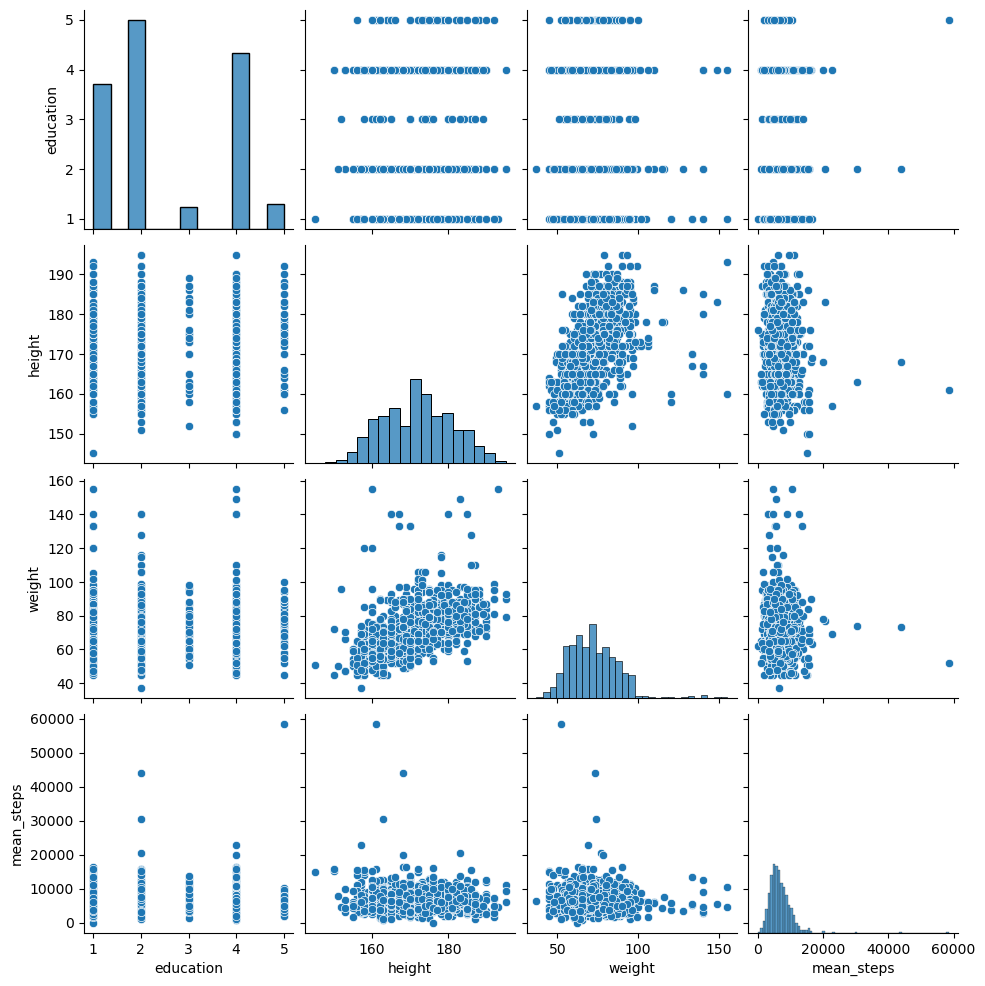

In [92]:
sns.pairplot(df_subset1)

Ik heb eerst een lijst aangemaakt met alleen de kolommen die ik mee wilde nemen. Hier heb ik de data met stappen per dag weggelaten. Vervolgens heb ik scatterplots van de relaties gemaakt.

In [94]:
df_subset1.corr()

,education,height,weight,mean_steps
education,1.000000,-0.035723,0.005676,0.035516
height,-0.035723,1.000000,0.511067,-0.090355
weight,0.005676,0.511067,1.000000,-0.068433
mean_steps,0.035516,-0.090355,-0.068433,1.000000


Ik heb de correlatie tussen de gewenste variabelen, die onder "df_subset1" vallen, berekend.

In de tabel met resultaten op het gebied van correlatie is te zien dat er voor alle verbanden tussen variabelen een zwakke correlatie is, behalve bij de variabelen height en weight (gematigde correlatie). Dit is te verklaren omdat een langer persoon sneller meer massa heeft.

Er is sprake van lineaire regressie als waarde y steeds in verhouding met dezelfde stap omhoog gaat als waarde x, de waardes in de grafiek vormen samen een lijn.  

In [109]:
x = df[["20-6-2013" : "13-5-2014"]] 
y = df["mean_steps"]
lm = LinearRegression() 
lm = lm.fit(x, y) 

SyntaxError: invalid syntax (2857612647.py, line 1)

In [108]:
stuff = ["20-6-2013" : "13-5-2014"]
for L in range(len(stuff) + 1):
  for subset in itertools.combinations(stuff, L):
    combi = list(subset)
    
    if len(combi) != 0:
      x = df[combi] 
      y = df["mean_steps"]
      lm = LinearRegression() 
      lm = lm.fit(x, y) 
      df["mean_steps_p"] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
      r2 = r2_score(df["mean_steps"], df["mean_steps_p"])
      print(combi, r2)

SyntaxError: invalid syntax (3738675842.py, line 1)

Het is mij helaas niet gelukt om "Fit a linear regression model to predict the mean steps per participant, using the training data. Extra challenge: see if you can find out how to include the categorical variables, such as gender." uit te voeren. Ik zou er graag achter willen komen hoe ik dit wel had moeten doen, de opgaven in de les lukten namelijk wel. 

Vervolgens zou ik r2_score(df["mean_steps"], df["mean_steps_p"]) hebben toegepast om uit te rekenen hoe goed de predicted mean steps overeenkomt met de werkelijke mean steps. Hier zou een getal uit moeten komen tussen de 0 en de 1, hoe dichter bij de 1 hoe beter de 2 variabelen overeenkomen. 

Hiermee had ik ook een Y-Y plot willen maken. Als bij de vorige opgave 1 was uitgekomen zou hier als het goed is lineaire regressie te zien zijn. 

Uiteindelijk kan ik concluderen dat de verschillende variabelen zwak correleren en length gematigd correleert met weight. Over de uitkomsten tussen de gemiddelde stappen en de voorspelde gemiddelde stappen kan ik helaas niks zeggen.